# Computer Vision and OpenCV
- Course: Self Driving Car Nanodegree
- Lesson: Advanced Lane Finding
- Topic: Magnitude

    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel in the X axis:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

    # Sobel in the Y axis:
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    # Absolute value from the x derivative
    abs_sobelx = np.absolute(sobelx)
    
    # Absolute value from the x derivative
    abs_sobely = np.absolute(sobely)
    
    ########## Gradient magnitude (from both axis) ##############################
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Convert absolute value image to 8-bit 
    scaled_<measure> = np.uint8(255 * <measure> / np.max(<measure>))
    
    # Apply min max thresholds and convert to 0 if not in the range and 1 if within the range
    binary_output = np.zeros_like(scaled_<measure>)
    binary_output[(scaled_<measure> >= thresh_min) & (scaled_<measure> <= thresh_max)] = 1
    
    # Plot grayscale output
    plt.imshow(binary_output, cmap='gray')

Sobel operator allows to calculate the image derivative in X or Y axis. It can be used to identify horizontal or vertical lines at an image. The kernel size is always an odd number and a greater kernel can smooth noisy intensity.

The example below present a pipeline to apply the magnitude (derivative in both axis) threshold.

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image
image = mpimg.imread('12-input-imgCenterCamera-bendRight.jpg')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scale_magnitude)
    binary_output[(scale_magnitude > mag_thresh[0]) & (scale_magnitude < mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [26]:
# Plot Udacity result
def plotResult():
    global image
    # Run the function
    mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(mag_binary, cmap='gray')
    ax2.set_title('Thresholded Magnitude', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plotResult()

In [24]:
def plotResultTest(image, sobel_kernel, thresh):
    mag_binary = mag_thresh(image, sobel_kernel, thresh)
    f, ax = plt.subplots(1, 1)
    ax.imshow(mag_binary, cmap='gray')
    ax.set_title('Thresholded {} - {} / Kernel {}'.format(thresh[0], thresh[1], sobel_kernel))
    plt.show()

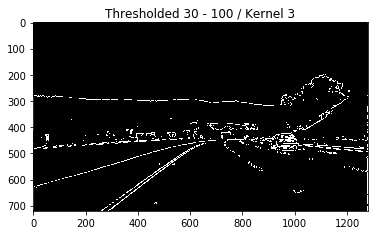

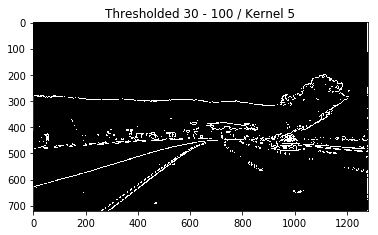

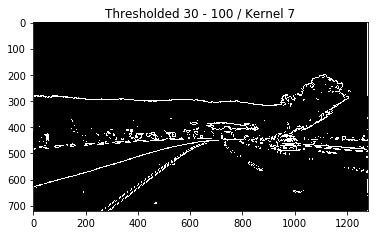

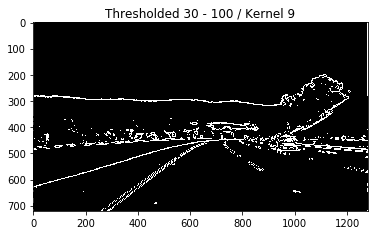

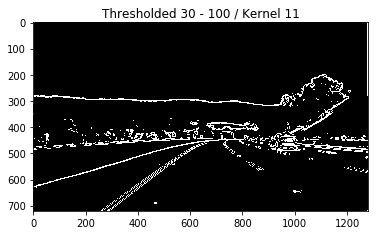

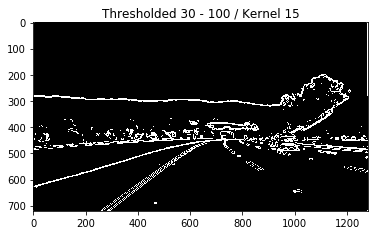

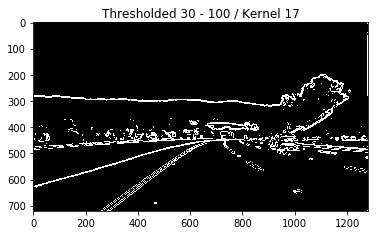

In [25]:
plotResultTest(image, 3, (30, 100))
plotResultTest(image, 5, (30, 100))
plotResultTest(image, 7, (30, 100))
plotResultTest(image, 9, (30, 100))
plotResultTest(image, 11, (30, 100))
plotResultTest(image, 15, (30, 100))
plotResultTest(image, 17, (30, 100))

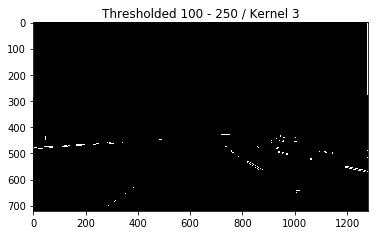

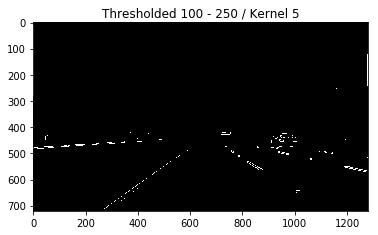

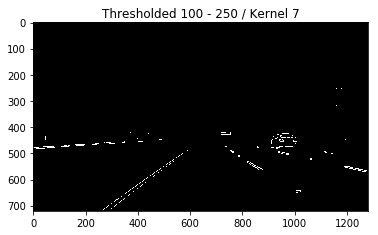

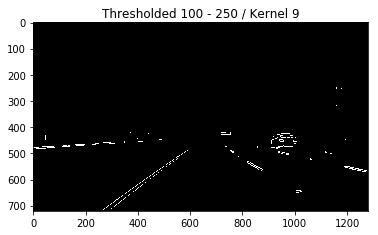

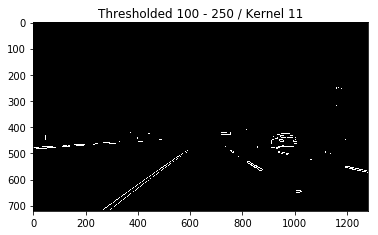

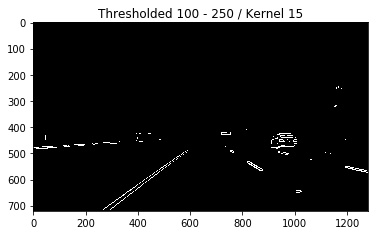

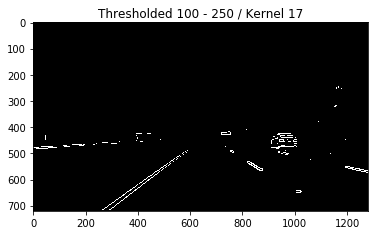

In [21]:
plotResultTest(image, 3, (100, 250))
plotResultTest(image, 5, (100, 250))
plotResultTest(image, 7, (100, 250))
plotResultTest(image, 9, (100, 250))
plotResultTest(image, 11, (100, 250))
plotResultTest(image, 15, (100, 250))
plotResultTest(image, 17, (100, 250))

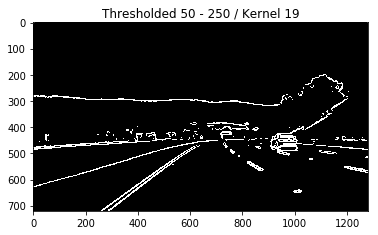

In [27]:
plotResultTest(image, 19, (50, 250))

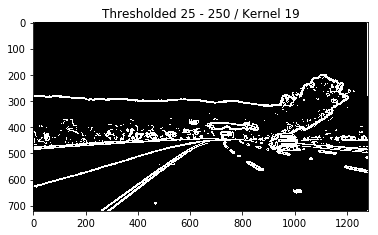

In [30]:
plotResultTest(image, 19, (25, 250))

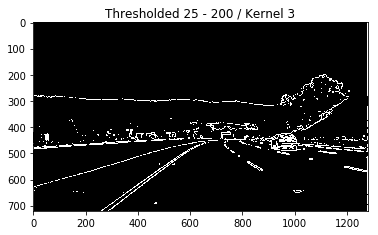

In [35]:
plotResultTest(image, 3, (25, 200))

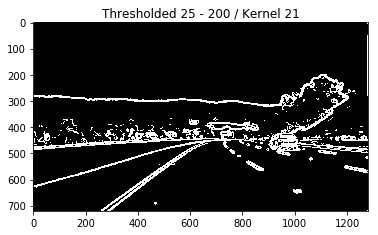

In [42]:
plotResultTest(image, 21, (25, 200))